In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd

# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('./health.csv')

# Display the first 5 rows to verify the data was loaded correctly


In [3]:
df.head()

,patientid,healthassessmentid,assessment_date,n_assessment,assessment_number,final_assessment,assessment_year,assessment_type,assessment_quarter,assessment_month,...,imd_idaopi_score,glucose,tot_cholesterol,alcohol_consumption,regular_exercise,t2dm_nice,prediabetic,first_to_last,days_between_ha,years_between_ha
0,0x0001EC929E1AB41684A7B5528628E4B7,0x97B5EB4313702E21828DD59E5BC4F085,13oct2017,1,1,1,2017,1,4,10,...,0.024,3.8,4.68,1,0,0,0,NaN,NaN,NaN
1,0x0004022CC26B79C37471E953F521D0DC,0x786B53CCD0FF6397100F4080465628E0,01may2018,1,1,1,2018,4,2,5,...,0.110,5.3,6.20,1,1,0,0,NaN,NaN,NaN
2,0x00044057F135CC6526BE752AD83115F6,0x6B04800E0E852F8C997D9AD8019B868E,13apr2018,1,1,1,2018,3,2,4,...,0.120,5.6,6.10,2,1,0,1,NaN,NaN,NaN
3,0x000527A13F12637CFD34616163AFBC48,0xB0E4800F18AD1367A01658AA1A7736EF,12may2014,2,1,0,2014,4,2,5,...,0.071,5.9,4.60,0,1,0,1,NaN,NaN,NaN
4,0x000527A13F12637CFD34616163AFBC48,0x6A1A149F1B99B942F3C3938A85799151,21mar2016,2,2,1,2016,4,1,3,...,0.071,5.3,4.40,0,1,0,0,2.0,679.0,2.0


In [4]:
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Exploratory Data Analysis focused on Prediabetic Status

# 1. Basic overview of the target variable
print("Prediabetic Status Distribution:")
prediabetic_counts = df['prediabetic'].value_counts()
prediabetic_percent = df['prediabetic'].value_counts(normalize=True).mul(100).round(2)
pd.DataFrame({
    'Count': prediabetic_counts,
    'Percentage (%)': prediabetic_percent
})


Prediabetic Status Distribution:


,Count,Percentage (%)
0,90764,77.43
1,26455,22.57


In [6]:

# 2. Correlation of health metrics with prediabetic status
health_metrics = ['age', 'bmi', 'glucose', 'systolic', 'diastolic', 
                  'body_composition_fat', 'tot_cholesterol', 'weight']
correlation_with_target = df[health_metrics + ['prediabetic']].corr()['prediabetic'].sort_values(ascending=False)
print("\nCorrelation with Prediabetic Status:")
print(correlation_with_target)


Correlation with Prediabetic Status:
prediabetic             1.000000
glucose                 0.407850
age                     0.217637
weight                  0.169186
systolic                0.152979
diastolic               0.146543
bmi                     0.142745
tot_cholesterol         0.099222
body_composition_fat    0.035279
Name: prediabetic, dtype: float64


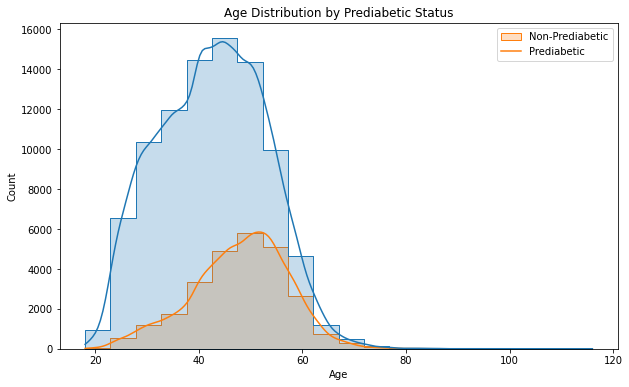

In [7]:


# 3. Age distribution by prediabetic status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='prediabetic', bins=20, kde=True, element="step")
plt.title('Age Distribution by Prediabetic Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Non-Prediabetic', 'Prediabetic'])
plt.show()

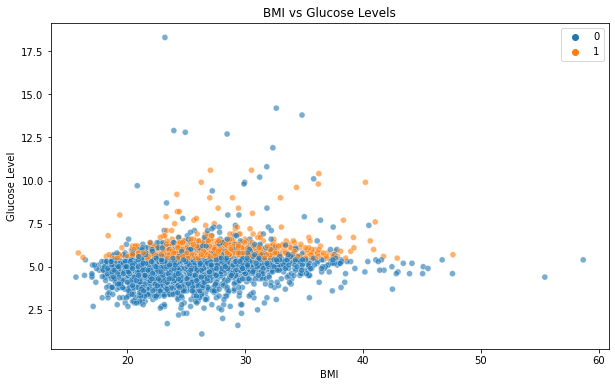

In [13]:
# 4. BMI vs Glucose colored by prediabetic status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='bmi', y='glucose', hue='prediabetic', alpha=0.6)
# plt.axhline(y=5.7, color='r', linestyle='--', label='Pre-diabetic threshold (5.7)')
# plt.axhline(y=6.5, color='orange', linestyle='--', label='Diabetic threshold (6.5)')
plt.title('BMI vs Glucose Levels')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.legend()
plt.show()

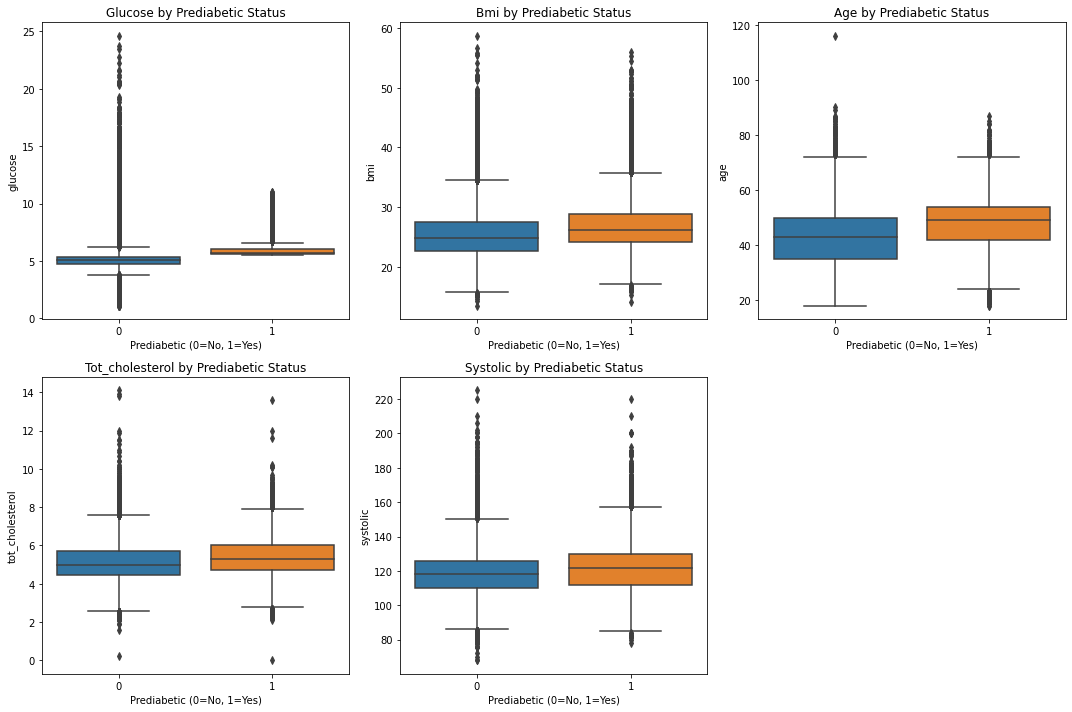

In [14]:




# 5. Health metrics comparison by prediabetic status
plt.figure(figsize=(15, 10))

health_vars = ['glucose', 'bmi', 'age', 'tot_cholesterol', 'systolic']
for i, var in enumerate(health_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='prediabetic', y=var, data=df)
    plt.title(f'{var.capitalize()} by Prediabetic Status')
    plt.xlabel('Prediabetic (0=No, 1=Yes)')

plt.tight_layout()
plt.show()


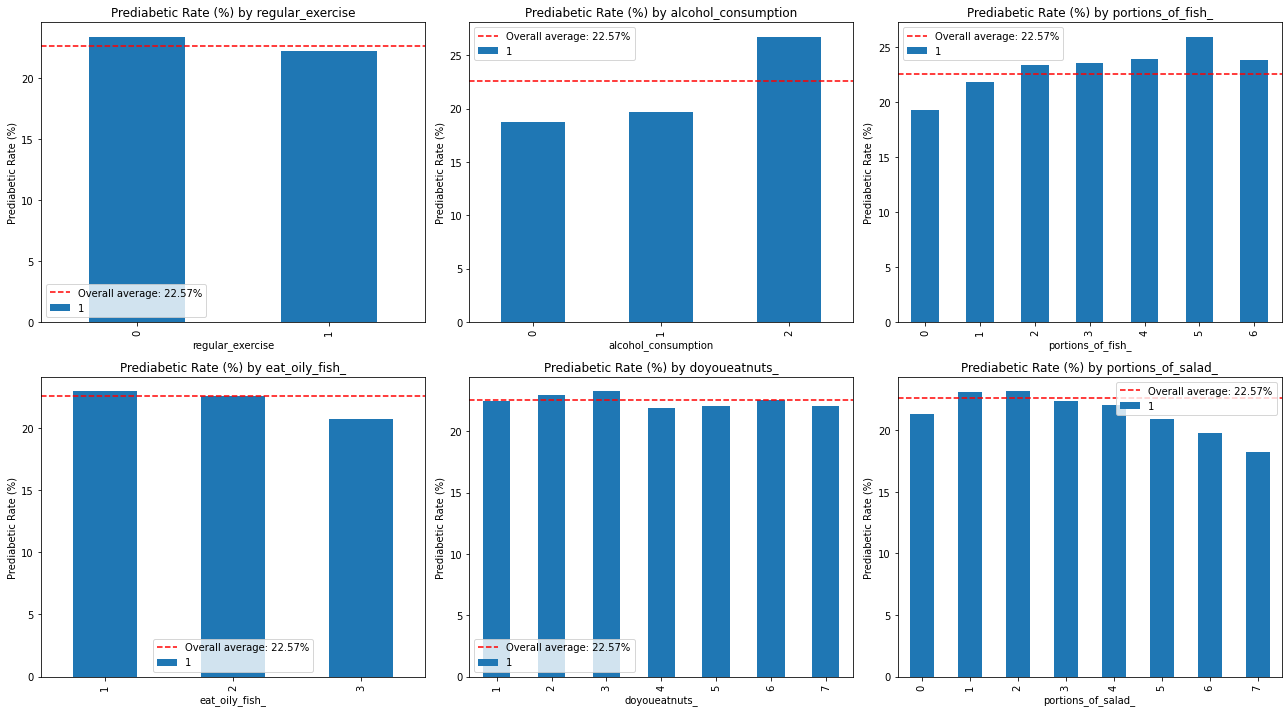

In [16]:

# 6. Lifestyle factors analysis
lifestyle_vars = ['regular_exercise', 'alcohol_consumption', 'portions_of_fish_', 
                  'eat_oily_fish_', 'doyoueatnuts_', 'portions_of_salad_']

plt.figure(figsize=(18, 10))
for i, var in enumerate(lifestyle_vars):
    plt.subplot(2, 3, i+1)
    
    # Calculate percentage of prediabetic by category
    crosstab = pd.crosstab(df[var], df['prediabetic'], normalize='index') * 100
    crosstab[1].plot(kind='bar')
    
    plt.title(f'Prediabetic Rate (%) by {var}')
    plt.xlabel(var)
    plt.ylabel('Prediabetic Rate (%)')
    plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--', 
                label=f'Overall average: {df["prediabetic"].mean()*100:.2f}%')
    plt.legend()
    
plt.tight_layout()
plt.show()


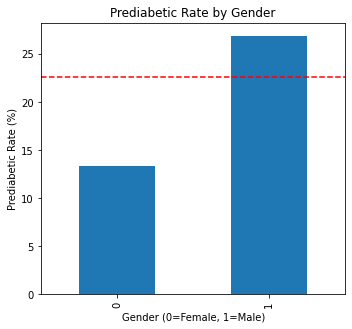

In [18]:
# 7. Demographic analysis
plt.figure(figsize=(12, 5))

# Gender comparison
plt.subplot(1, 2, 1)
gender_prediabetic = df.groupby('gender')['prediabetic'].mean() * 100
gender_prediabetic.plot(kind='bar')
plt.title('Prediabetic Rate by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Prediabetic Rate (%)')
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--')

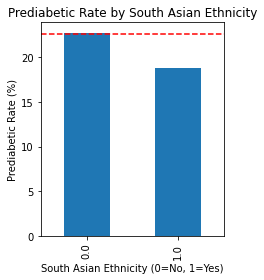

In [19]:



# South Asian ethnicity comparison
plt.subplot(1, 2, 2)
if 'south_asian_ethnicity' in df.columns and df['south_asian_ethnicity'].notna().any():
    ethnicity_prediabetic = df.groupby('south_asian_ethnicity')['prediabetic'].mean() * 100
    ethnicity_prediabetic.plot(kind='bar')
    plt.title('Prediabetic Rate by South Asian Ethnicity')
    plt.xlabel('South Asian Ethnicity (0=No, 1=Yes)')
    plt.ylabel('Prediabetic Rate (%)')
    plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--')

plt.tight_layout()
plt.show()


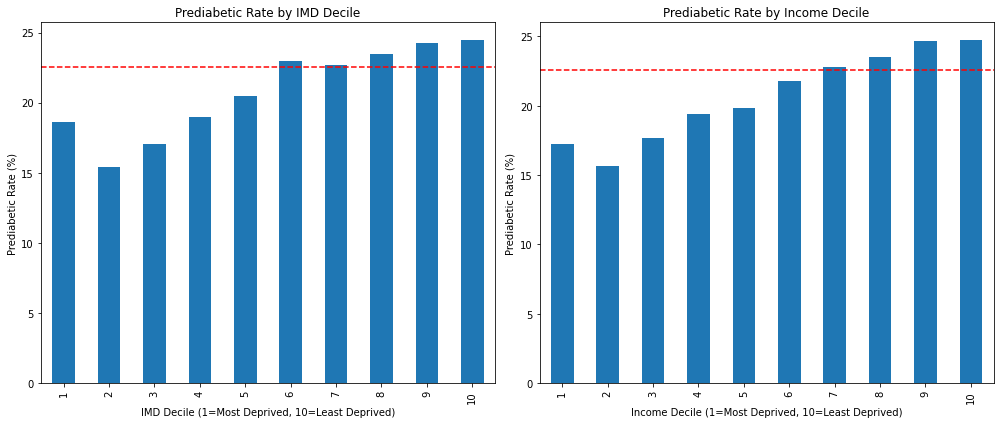

In [11]:

# 8. Socioeconomic factors analysis (using IMD deciles)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
imd_prediabetic = df.groupby('imd_decile')['prediabetic'].mean() * 100
imd_prediabetic.plot(kind='bar')
plt.title('Prediabetic Rate by IMD Decile')
plt.xlabel('IMD Decile (1=Most Deprived, 10=Least Deprived)')
plt.ylabel('Prediabetic Rate (%)')
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--')

# Income decile
plt.subplot(1, 2, 2)
income_prediabetic = df.groupby('imd_income_decile')['prediabetic'].mean() * 100
income_prediabetic.plot(kind='bar')
plt.title('Prediabetic Rate by Income Decile')
plt.xlabel('Income Decile (1=Most Deprived, 10=Least Deprived)')
plt.ylabel('Prediabetic Rate (%)')
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [20]:


# 9. Summary of key findings
print("\nSummary of Key Findings:")
print(f"- Overall prediabetic rate: {df['prediabetic'].mean()*100:.2f}%")
print(f"- Highest correlation with prediabetic status: {correlation_with_target.index[0]} ({correlation_with_target.iloc[0]:.3f})")
print(f"- Average glucose level in prediabetic group: {df[df['prediabetic']==1]['glucose'].mean():.2f}")
print(f"- Average glucose level in non-prediabetic group: {df[df['prediabetic']==0]['glucose'].mean():.2f}")
print(f"- Average BMI in prediabetic group: {df[df['prediabetic']==1]['bmi'].mean():.2f}")
print(f"- Average BMI in non-prediabetic group: {df[df['prediabetic']==0]['bmi'].mean():.2f}")


Summary of Key Findings:
- Overall prediabetic rate: 22.57%
- Highest correlation with prediabetic status: prediabetic (1.000)
- Average glucose level in prediabetic group: 5.86
- Average glucose level in non-prediabetic group: 5.02
- Average BMI in prediabetic group: 26.75
- Average BMI in non-prediabetic group: 25.39


Overall prediabetes prevalence: 22.57%


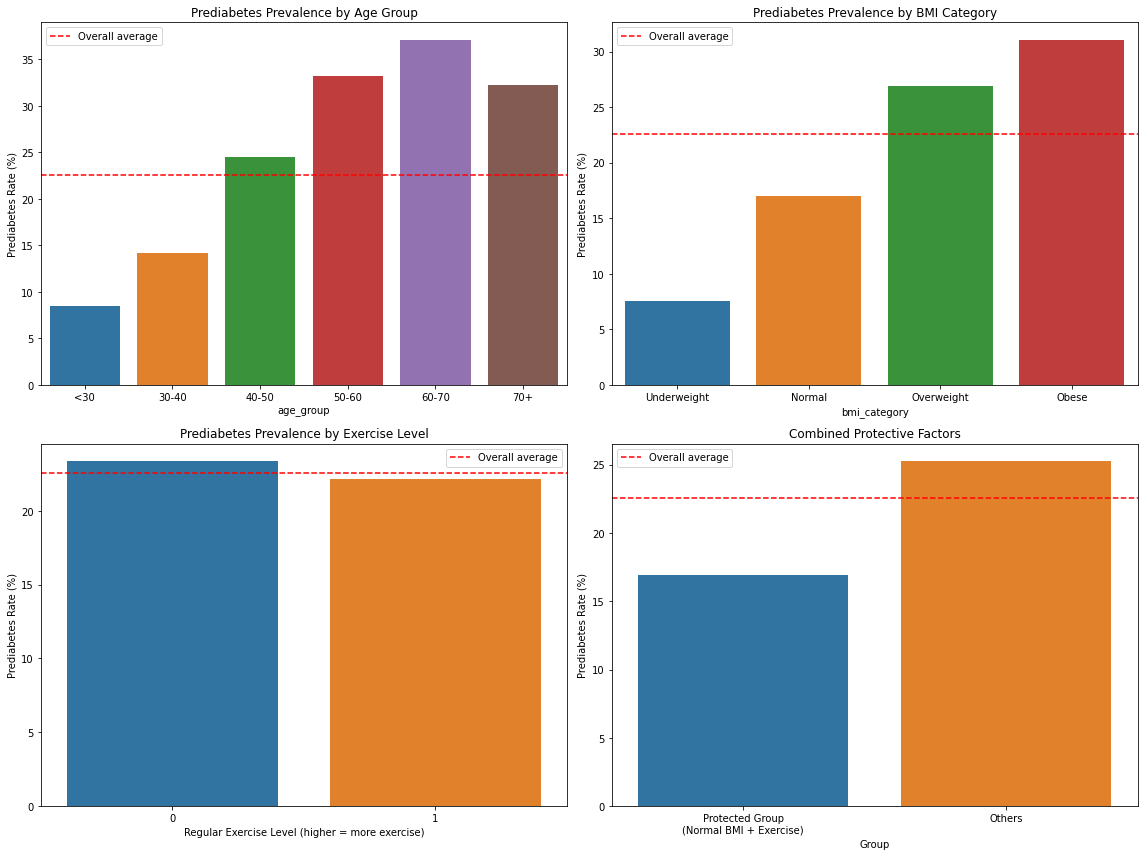


Top 5 Potentially Protected Groups:
1. Normal BMI + Regular Exercise: 16.94% (vs overall 22.57%)
2. High Fish Consumption: 19.23% (group size: 10747.0)
3. Regular Nuts Consumption: 21.90% (group size: 12372.0)
4. Age Group <30: 8.49% (group size: 14826)

Statistical significance of protection effect: p-value = 0.000000
Protected groups have 8.33% lower prediabetes rate


In [10]:
from scipy import stats

# Find clusters or populations potentially "protected" from prediabetes
print("Overall prediabetes prevalence: {:.2f}%".format(df['prediabetic'].mean() * 100))

# Create a function to analyze prediabetes prevalence across different factors
def analyze_protection_factor(factor, min_group_size=100):
    if factor not in df.columns:
        print(f"Column {factor} not found in dataframe")
        return None
    
    # Skip if too many missing values
    if df[factor].isna().sum() > 0.5 * len(df):
        print(f"Too many missing values in {factor}")
        return None
    
    # Handle different data types appropriately
    if df[factor].dtype == 'object':
        # For categorical variables
        grouped = df.groupby(factor)['prediabetic'].agg(['mean', 'count']).reset_index()
        grouped['mean'] = grouped['mean'] * 100  # Convert to percentage
        
    elif df[factor].dtype in ['int64', 'float64']:
        # For numerical variables, create bins
        if df[factor].nunique() > 10:
            # Create quantile bins for continuous variables
            df[f'{factor}_bin'] = pd.qcut(df[factor], 5, duplicates='drop')
            grouped = df.groupby(f'{factor}_bin')['prediabetic'].agg(['mean', 'count']).reset_index()
            grouped['mean'] = grouped['mean'] * 100
        else:
            # Discrete numerical variables
            grouped = df.groupby(factor)['prediabetic'].agg(['mean', 'count']).reset_index()
            grouped['mean'] = grouped['mean'] * 100
    
    # Filter groups that are too small
    grouped = grouped[grouped['count'] >= min_group_size]
    
    # Sort by prediabetes rate
    grouped = grouped.sort_values('mean')
    
    return grouped

# Analyze demographic factors
demographic_factors = ['age', 'gender', 'south_asian_ethnicity']
health_factors = ['bmi', 'systolic', 'diastolic', 'body_composition_fat', 'alcohol_consumption', 'regular_exercise']
lifestyle_factors = ['portions_of_fish_', 'eat_oily_fish_', 'doyoueatnuts_', 'portions_of_salad_']
socioeconomic_factors = ['imd_decile', 'imd_income_decile', 'imd_employment_decile']

# Create a figure to visualize "protected" populations
plt.figure(figsize=(16, 12))

# 1. Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
age_results = df.groupby('age_group')['prediabetic'].agg(['mean', 'count']).reset_index()
age_results['mean'] *= 100

plt.subplot(2, 2, 1)
sns.barplot(x='age_group', y='mean', data=age_results)
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--', label='Overall average')
plt.title('Prediabetes Prevalence by Age Group')
plt.ylabel('Prediabetes Rate (%)')
plt.legend()

# 2. BMI categories
df['bmi_category'] = pd.cut(df['bmi'].dropna(), 
                          bins=[0, 18.5, 25, 30, 100], 
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_results = df.groupby('bmi_category')['prediabetic'].agg(['mean', 'count']).reset_index()
bmi_results['mean'] *= 100

plt.subplot(2, 2, 2)
sns.barplot(x='bmi_category', y='mean', data=bmi_results)
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--', label='Overall average')
plt.title('Prediabetes Prevalence by BMI Category')
plt.ylabel('Prediabetes Rate (%)')
plt.legend()

# 3. Regular exercise
exercise_results = df.groupby('regular_exercise')['prediabetic'].agg(['mean', 'count']).reset_index()
exercise_results['mean'] *= 100

plt.subplot(2, 2, 3)
sns.barplot(x='regular_exercise', y='mean', data=exercise_results)
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--', label='Overall average')
plt.title('Prediabetes Prevalence by Exercise Level')
plt.ylabel('Prediabetes Rate (%)')
plt.xlabel('Regular Exercise Level (higher = more exercise)')
plt.legend()

# 4. Combined protective factors
# Identify potential protective factors based on earlier analysis
# For example: normal BMI + regular exercise
protective_conditions = (df['bmi'].between(18.5, 25, inclusive='left') & 
                         (df['regular_exercise'] > 0))

# Compare protected group vs others
protected_group = df[protective_conditions]['prediabetic'].mean() * 100
other_group = df[~protective_conditions]['prediabetic'].mean() * 100

plt.subplot(2, 2, 4)
comparison_df = pd.DataFrame({
    'Group': ['Protected Group\n(Normal BMI + Exercise)', 'Others'],
    'Prediabetes Rate': [protected_group, other_group]
})
sns.barplot(x='Group', y='Prediabetes Rate', data=comparison_df)
plt.axhline(y=df['prediabetic'].mean()*100, color='r', linestyle='--', label='Overall average')
plt.title('Combined Protective Factors')
plt.ylabel('Prediabetes Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Find top 5 potentially "protected" populations
print("\nTop 5 Potentially Protected Groups:")
print(f"1. {'Normal BMI + Regular Exercise'}: {protected_group:.2f}% (vs overall {df['prediabetic'].mean()*100:.2f}%)")

# Fish consumption
fish_results = analyze_protection_factor('portions_of_fish_')
if fish_results is not None:
    min_fish = fish_results.iloc[0]
    print(f"2. {'High Fish Consumption'}: {min_fish['mean']:.2f}% (group size: {min_fish['count']})")

# Nuts consumption 
nuts_results = analyze_protection_factor('doyoueatnuts_')
if nuts_results is not None:
    min_nuts = nuts_results.iloc[0] 
    print(f"3. {'Regular Nuts Consumption'}: {min_nuts['mean']:.2f}% (group size: {min_nuts['count']})")

# Age
youngest_group = age_results.iloc[0]
print(f"4. {'Age Group ' + youngest_group['age_group']}: {youngest_group['mean']:.2f}% (group size: {youngest_group['count']})")

# Statistical significance test
# Test if the difference between protected group and others is statistically significant
t_stat, p_value = stats.ttest_ind(
    df[protective_conditions]['prediabetic'], 
    df[~protective_conditions]['prediabetic'], 
    equal_var=False
)
print(f"\nStatistical significance of protection effect: p-value = {p_value:.6f}")
print(f"Protected groups have {other_group - protected_group:.2f}% lower prediabetes rate")